```
Лабораторная работа 4

Знакомство с нейронными сетями и Keras
(можно использовать Tensorflow, Pytorch etc.)

1. Полносвязные сети (многослойный персептрон)
Решите задачу классификации на данных, с которыми вы работали в лабораторной No 2,
результат сравните с полученными ранее

2. Сверточные сети
Решите любую задачу по вашему выбору, обязательным условием является только
использование сверточных слоев (например задачу классификации изображений(если в
выбранном датасете много классов, достаточно оставить например 5), или генерации с
помощью GAN)

3. Рекуррентные сети
Решите любую задачу по вашему выбору, обязательным условием является только
использование рекуррентной сети (это может быть предсказание значений временного
ряда или задача классификации текстов)

Датасеты для задания No 2 (MNIST и CIFAR-10 не использовать) можно брать отсюда:
https://www.kaggle.com/tags/image-data
Для задания No 3
временные ряды:
https://www.kaggle.com/tags/time-series
тексты можно брать те же, что и в лабораторной No 3
```

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("bird.csv")
df = df.fillna(df.mean())
df = df.drop(columns=['id'])
feature_columns = ['huml', 'humw', 'ulnal', 'ulnaw', 'feml', 'femw', 'tibl', 'tibw', 'tarl', 'tarw'] # numeric feature columns.
X = df.drop('type', axis = 1).values
y = df['type'].values.reshape(-1,1)
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## 1. Полносвязные сети (многослойный персептрон)
Решите задачу классификации на данных, с которыми вы работали в лабораторной No 2,
результат сравните с полученными ранее

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import  export_graphviz

from sklearn.neural_network import MLPClassifier

In [8]:
parameters_mlp = {  'model__activation' : ['identity', 'logistic', 'tanh', 'relu'],
                    'model__hidden_layer_sizes' : [1000, 2000],
                    'model__solver' : ['sgd', 'adam'],
                    'model__learning_rate' : ['constant', 'invscaling', 'adaptive'],
                    'model__random_state':[0]
                 }

In [9]:
def apply_ml_model(ml_model,parameters, X_train, y_train):
    steps = [
        ('scalar', StandardScaler()),
        ('model', ml_model)
    ]
    model_pipe = Pipeline(steps)

    ml_model = GridSearchCV(model_pipe, parameters, cv = 3, n_jobs = -1)
    ml_model = ml_model.fit(X_train, y_train.ravel())
    
    y_pred_train = ml_model.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_pred_train)

    y_pred_test = ml_model.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    
    print("confusion_matrix")
    sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cmap = 'viridis', fmt='.0f')
    plt.show()
    print("Training set: ", accuracy_train)
    print("Test set: ", accuracy_test)
    print(classification_report(y_test, y_pred_test))
    print(ml_model.best_params_)

/home/maksym_shylo/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


confusion_matrix


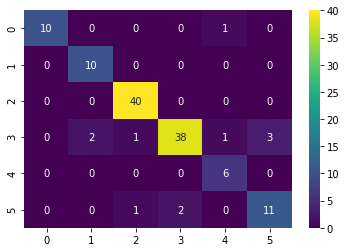

Training set:  0.9591836734693877
Test set:  0.9126984126984127
              precision    recall  f1-score   support

           P       1.00      0.91      0.95        11
           R       0.83      1.00      0.91        10
          SO       0.95      1.00      0.98        40
          SW       0.95      0.84      0.89        45
           T       0.75      1.00      0.86         6
           W       0.79      0.79      0.79        14

    accuracy                           0.91       126
   macro avg       0.88      0.92      0.90       126
weighted avg       0.92      0.91      0.91       126

{'model__activation': 'relu', 'model__hidden_layer_sizes': 2000, 'model__learning_rate': 'constant', 'model__random_state': 0, 'model__solver': 'adam'}


In [10]:
ml_model = MLPClassifier()
apply_ml_model(ml_model,parameters_mlp, X_train, y_train)

`KNN`

Training set:  1.0

Test set:  0.7904761904761904

`RFC`

Training set:  1.0

Test set:  0.819047619047619
    
`AdaBoost`

Training set:  0.8126984126984127

Test set:  0.6285714285714286
    
`SVC`

Training set:  0.9682539682539683

Test set:  0.8952380952380953

`GradientBoost`

Training set:  1.0

Test set:  0.7904761904761904

`DecisionTree`

Training set:  0.9714285714285714

Test set:  0.6952380952380952

## 2. Сверточные сети
Решите любую задачу по вашему выбору, обязательным условием является только
использование сверточных слоев (например задачу классификации изображений(если в
выбранном датасете много классов, достаточно оставить например 5), или генерации с
помощью GAN)

In [3]:
import os
import PIL
import tensorflow as tf
import random

import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers 
from tensorflow.keras.layers.experimental import preprocessing
import cv2
from tensorflow.keras.callbacks import EarlyStopping
from matplotlib.pyplot import plot
from PIL import Image
from sklearn.utils import shuffle

In [12]:
train_dir = 'intel-image-classification/seg_train/seg_train/'
test_dir = 'intel-image-classification/seg_test/seg_test/'
pred_dir = 'intel-image-classification/seg_pred/seg_pred/'

In [13]:
def get_images(directory):
    category = 0
    a = []
    b = []
    for l in os.listdir(directory):
        if l == 'buildings':
            category = 0 
        elif l == 'forest':
            category = 1
        elif l == 'glacier':
            category = 2
        elif l == 'mountain':
            category = 3
        elif l == 'sea':
            category = 4
        elif l == 'street':
            category = 5
        
        
        for file in os.listdir(directory+l):
            img = cv2.imread(os.path.join(directory+l,file))
            resized_img = cv2.resize(img,(150,150))
            a.append(resized_img)
            b.append(category)
            
    return shuffle(a,b,random_state=817328462)

In [14]:
X,y = get_images('intel-image-classification/seg_train/seg_train/')
X = np.array(X)
y = np.array(y)

In [15]:
X_test,y_test = get_images('intel-image-classification/seg_test/seg_test/')
X_test = np.array(X_test)
y_test = np.array(y_test)
print(X_test.shape,y_test.shape)

(3000, 150, 150, 3) (3000,)


In [16]:
X_pred,y_pred = get_images('intel-image-classification/seg_pred/')
X_pred = np.array(X_pred)
X_pred.shape

(7301, 150, 150, 3)

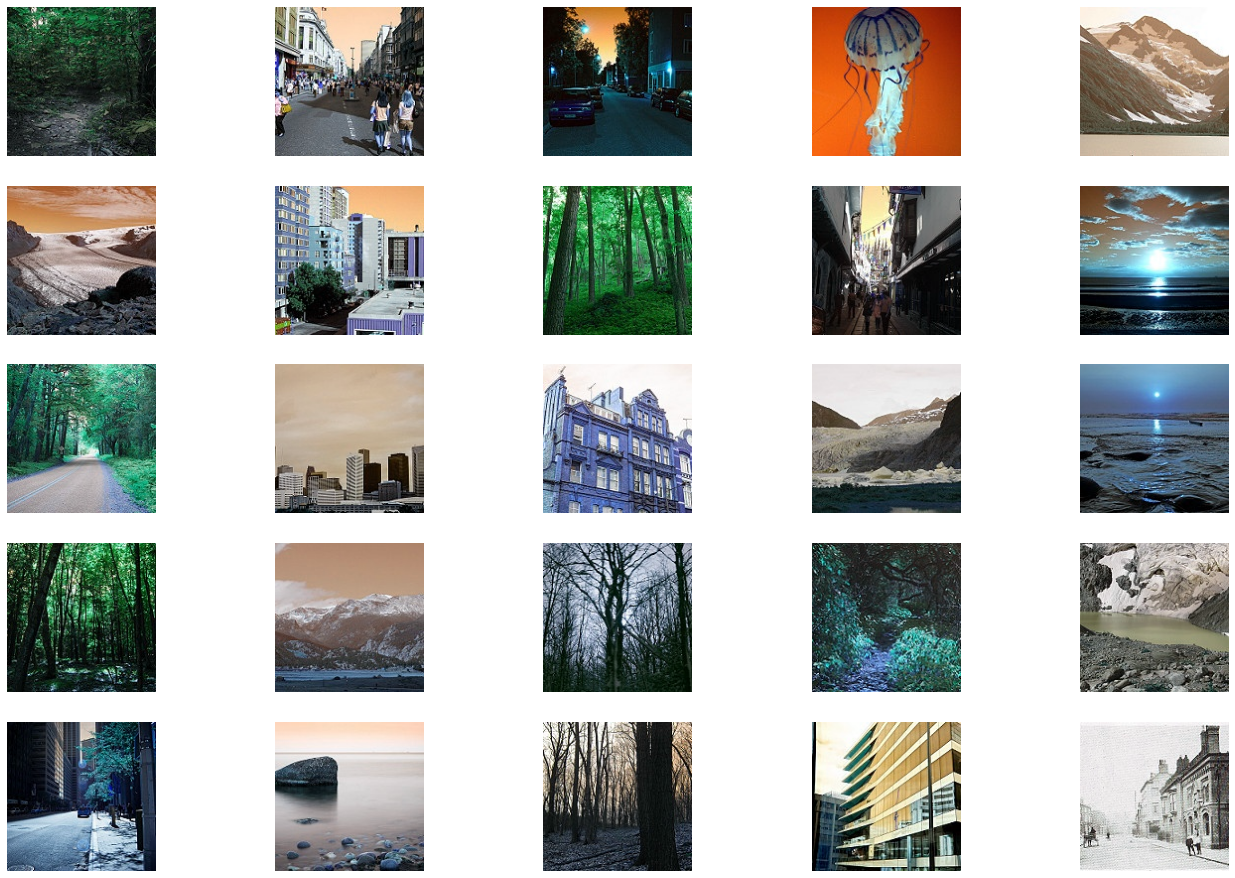

In [29]:
f,ax = plt.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = random.randint(0,len(X))
        ax[i,j].imshow(X[rnd_number])
        ax[i,j].axis('off')

In [17]:
# clasess for clasification
os.listdir(train_dir)

['sea', 'street', 'mountain', 'forest', 'glacier', 'buildings']

In [17]:
model = Sequential([
    
    layers.InputLayer(input_shape=X.shape[1:]),
    
    # Data Augmentation
    preprocessing.RandomContrast(factor=0.10),
    preprocessing.RandomFlip(mode='horizontal'),
    preprocessing.RandomRotation(factor=0.10),
    
    # Block One
    layers.BatchNormalization(),
    layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),

    # Block Two
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),

    # Block Three
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    layers.Dropout(0.5),
    layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),

    # Head
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(6, activation='softmax'),
])

early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=10, # how many epochs to wait before stopping
    restore_best_weights=True,
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_contrast (RandomContr (None, 150, 150, 3)       0         
_________________________________________________________________
random_flip (RandomFlip)     (None, 150, 150, 3)       0         
_________________________________________________________________
random_rotation (RandomRotat (None, 150, 150, 3)       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 150, 150, 3)       12        
_________________________________________________________________
conv2d (Conv2D)              (None, 150, 150, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 64)        0

In [20]:
from tensorflow.keras.applications import ResNet50

pretrained_base = ResNet50(input_shape = (150, 150, 3), 
                        include_top = False, 
                        weights = 'imagenet')
pretrained_base.trainable = False

model_2 = Sequential([
    pretrained_base,
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(6, activation='softmax'),
])

model_2.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

history_2 = model_2.fit(X,y,epochs=3,validation_split=0.2,callbacks=early_stopping)

Epoch 1/3
351/351 [==============================] - 634s 2s/step - loss: 0.5586 - sparse_categorical_accuracy: 0.8654 - val_loss: 0.3480 - val_sparse_categorical_accuracy: 0.8938
Epoch 2/3
351/351 [==============================] - 634s 2s/step - loss: 0.1945 - sparse_categorical_accuracy: 0.9345 - val_loss: 0.3904 - val_sparse_categorical_accuracy: 0.9042
Epoch 3/3
351/351 [==============================] - 633s 2s/step - loss: 0.1272 - sparse_categorical_accuracy: 0.9563 - val_loss: 0.3374 - val_sparse_categorical_accuracy: 0.9077


In [21]:
model_2.save("intel-class_im.hdf5")

In [18]:
model.load_weights("intel-class_im.hdf5")

In [ ]:
3. Рекуррентные сети
Решите любую задачу по вашему выбору, обязательным условием является только
использование рекуррентной сети (это может быть предсказание значений временного
ряда или задача классификации текстов)

In [4]:
import numpy as np

import tensorflow_datasets as tfds
import tensorflow as tf

tfds.disable_progress_bar()

In [12]:
dataset, info = tfds.load('imdb_reviews', with_info=True,
                          as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

train_dataset.element_spec

(TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [13]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)

In [14]:
VOCAB_SIZE=1000
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))
vocab = np.array(encoder.get_vocabulary())

In [15]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [16]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [17]:
history = model.fit(train_dataset, epochs=3,
                    validation_data=test_dataset, 
                    validation_steps=30)

Epoch 1/3
391/391 [==============================] - 426s 1s/step - loss: 0.6399 - accuracy: 0.5719 - val_loss: 0.4780 - val_accuracy: 0.7646
Epoch 2/3
391/391 [==============================] - 357s 913ms/step - loss: 0.4165 - accuracy: 0.8074 - val_loss: 0.3807 - val_accuracy: 0.8307
Epoch 3/3
391/391 [==============================] - 351s 898ms/step - loss: 0.3506 - accuracy: 0.8462 - val_loss: 0.3496 - val_accuracy: 0.8411


In [18]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

391/391 [==============================] - 81s 208ms/step - loss: 0.3352 - accuracy: 0.8515
Test Loss: 0.3352210819721222
Test Accuracy: 0.8514800071716309


In [19]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

In [20]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [21]:
history = model.fit(train_dataset, epochs=3,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/3
391/391 [==============================] - 791s 2s/step - loss: 0.6212 - accuracy: 0.5866 - val_loss: 0.4570 - val_accuracy: 0.7615
Epoch 2/3
391/391 [==============================] - 630s 2s/step - loss: 0.3954 - accuracy: 0.8240 - val_loss: 0.3572 - val_accuracy: 0.8453
Epoch 3/3
391/391 [==============================] - 611s 2s/step - loss: 0.3441 - accuracy: 0.8502 - val_loss: 0.3314 - val_accuracy: 0.8526


In [22]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

391/391 [==============================] - 137s 350ms/step - loss: 0.3231 - accuracy: 0.8561
Test Loss: 0.3230780363082886
Test Accuracy: 0.8561199903488159
